[View in Colaboratory](https://colab.research.google.com/github/spajeo/DataAnalysis_MachineLearning/blob/master/DataChallenge/Classification_Regression_1119.ipynb)

# Overview

# Opening

##  Install

In [0]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [11]:
!rm *.csv

!wget https://www.dropbox.com/s/5s6h4qdxw3c735p/selected_from_rf_1119_features.csv?dl=0 -O input_train.csv
!wget https://www.dropbox.com/s/k5raqfwgk2ip8gd/output_train.csv?dl=0 -O output_train.csv

--2018-05-15 20:15:49--  https://www.dropbox.com/s/5s6h4qdxw3c735p/selected_from_rf_1119_features.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/S5zBxlXzHpaJDcO4hfYmE76dGYrvfFf9pxpxFaKXBK247re4BVzNwVMQMOoJQqPC/file [following]
--2018-05-15 20:15:50--  https://dl.dropboxusercontent.com/content_link/S5zBxlXzHpaJDcO4hfYmE76dGYrvfFf9pxpxFaKXBK247re4BVzNwVMQMOoJQqPC/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.65.6, 2620:100:6021:6::a27d:4106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.65.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59459376 (57M) [text/csv]
Saving to: ‘input_train.csv’

input_train.csv     100%[===================>]  56.70M  54.5MB/s    in 1.0s

In [12]:
!ls -la

total 58364
drwxr-xr-x 1 root root     4096 May 15 20:15 .
drwxr-xr-x 1 root root     4096 May 15 17:01 ..
drwx------ 4 root root     4096 May 15 17:02 .cache
drwxr-xr-x 3 root root     4096 May 15 17:02 .config
drwxr-xr-x 1 root root     4096 Apr 30 16:29 datalab
drwxr-xr-x 4 root root     4096 May 15 17:02 .forever
-rw-r--r-- 1 root root 59459376 May 15 20:15 input_train.csv
drwxr-xr-x 5 root root     4096 May 15 17:02 .ipython
drwx------ 3 root root     4096 May 15 17:02 .local
-rw-r--r-- 1 root root   253901 May 15 20:15 output_train.csv
-rw------- 1 root root     1024 May 15 17:02 .rnd
-rw-r--r-- 1 root root      220 May 15 17:03 .wget-hsts


In [13]:


%%time
%env JOBLIB_TEMP_FOLDER=/tmp

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV




from google.colab import files

from random import shuffle
from math import floor
import numpy as np

np.random.seed(1)

Ytrain = pd.read_csv("output_train.csv", sep=';')
all_y = Ytrain.set_index('Ids')
all_y = all_y['TARGET']
print(Ytrain.head())

all_X = pd.read_csv("input_train.csv")

print(all_X.head())

datas_nrow = Ytrain.shape[0]


env: JOBLIB_TEMP_FOLDER=/tmp
   Ids  TARGET
0  ID0       0
1  ID1       0
2  ID2       0
3  ID3       0
4  ID4       1
   Unnamed: 0  0  1  2  3  4  5  6  7  8  ...   1109  1110  1111  1112  1113  \
0           0  0  1  1  1  0  0  0  0  0  ...      0     0     1     0     1   
1           1  0  0  1  1  0  0  0  0  1  ...      0     0     0     0     1   
2           2  0  1  1  0  0  0  0  0  1  ...      0     0     1     0     0   
3           3  0  0  1  0  0  1  1  0  1  ...      0     0     1     0     1   
4           4  0  0  0  1  0  1  0  0  1  ...      0     0     1     0     1   

   1114  1115  1116  1117  1118  
0     1     0     0     0     0  
1     0     0     0     1     1  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     1     1     0  

[5 rows x 1120 columns]
CPU times: user 5.28 s, sys: 555 ms, total: 5.84 s
Wall time: 5.94 s


## Libraires

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline

from numpy import loadtxt
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score




## results variable  &&  func select_model

In [0]:
result = dict()

In [0]:
def select_model(input, output, models):   
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=2,
                            return_train_score='warn', 
                            cv=3)
        grid.fit(input,output)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        model["cv_results"] =  grid.cv_results_ 

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        

    return models

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar()
    plt.show()

# Classification First Large Scale Test

## Classification Liste





* LinearSVC 

* KNeighborsClassifier


* SVC

* EnsembleClassifiers
    * RandomForest
    * AdaBoost
    * XGBoost
    * Gradient Tree Boosting Classifier
    
    * PassiveAggressiveClassifier
    *SGDRegressor


##  Test 1

In [0]:


# Consider pre-processing your data with StandardScaler or MinMaxScaler.
#   % self.max_iter, ConvergenceWarning)

def select_model(df):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LinearSVC",
            "estimator": LinearSVC(class_weight='balanced'),
            "hyperparameters":
                {
                    'random_state': [42]

                }
        }
            ,
        {
            "name": "SVC",
            "estimator": SVC(class_weight='balanced'),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        },
        {
            "name": "NuSVC",
            "estimator": SVC(class_weight='balanced'),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        },
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,40,6)

                }
        }, 
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        }

            ]    
    
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=3,
                            return_train_score='warn', 
                            cv=3)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        model["cv_results"] =  grid.cv_results_ 

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        

    return models

result += select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_gen_test_111.pkl")
allDone()

LinearSVC
---------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.6019756127486415, total=  23.7s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.7s remaining:    0.0s


[CV] ......... random_state=42, score=0.726802183824131, total=  23.3s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   47.1s remaining:    0.0s


[CV] ........ random_state=42, score=0.7317526298593188, total=  23.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


Best Score: 0.6868402729165062
Best Parameters: {'random_state': 42}

SVC
---
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ....... random_state=42, score=0.48420669014790785, total=17.2min
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.3min remaining:    0.0s


[CV] ........ random_state=42, score=0.4762385104055771, total=17.3min
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 49.0min remaining:    0.0s


[CV] ........ random_state=42, score=0.4853491549588617, total=17.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 73.7min finished


Best Score: 0.4819315376954983
Best Parameters: {'random_state': 42}

NuSVC
-----
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ....... random_state=42, score=0.48420669014790785, total=17.1min
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.3min remaining:    0.0s


[CV] ........ random_state=42, score=0.4762385104055771, total=16.9min
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 48.3min remaining:    0.0s


[CV] ........ random_state=42, score=0.4853491549588617, total=16.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 72.2min finished


Best Score: 0.4819315376954983
Best Parameters: {'random_state': 42}

LogisticRegression
------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.8168690862191892, total=   2.2s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ........ random_state=42, score=0.8170804979002293, total=   2.7s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV] ........ random_state=42, score=0.8146749980067941, total=   2.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


Best Score: 0.8162082189813982
Best Parameters: {'random_state': 42}

KNeighborsClassifier
--------------------
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] n_neighbors=1, random_state=42 ..................................


ValueError: ignored

### Resultat

Here are the first results
______________________________

----------------------------------------------
_____________________________
```
LinearSVC
---------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.6019756127486415, total=  23.7s
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.7s remaining:    0.0s
[CV] ......... random_state=42, score=0.726802183824131, total=  23.3s
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   47.1s remaining:    0.0s
[CV] ........ random_state=42, score=0.7317526298593188, total=  23.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished
Best Score: 0.6868402729165062
Best Parameters: {'random_state': 42}

SVC
---
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ....... random_state=42, score=0.48420669014790785, total=17.2min
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.3min remaining:    0.0s
[CV] ........ random_state=42, score=0.4762385104055771, total=17.3min
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 49.0min remaining:    0.0s
[CV] ........ random_state=42, score=0.4853491549588617, total=17.6min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 73.7min finished
Best Score: 0.4819315376954983
Best Parameters: {'random_state': 42}

NuSVC
-----
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ....... random_state=42, score=0.48420669014790785, total=17.1min
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.3min remaining:    0.0s
[CV] ........ random_state=42, score=0.4762385104055771, total=16.9min
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 48.3min remaining:    0.0s
[CV] ........ random_state=42, score=0.4853491549588617, total=16.8min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 72.2min finished
Best Score: 0.4819315376954983
Best Parameters: {'random_state': 42}

LogisticRegression
------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.8168690862191892, total=   2.2s
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[CV] ........ random_state=42, score=0.8170804979002293, total=   2.7s
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s
[CV] ........ random_state=42, score=0.8146749980067941, total=   2.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished
Best Score: 0.8162082189813982
Best Parameters: {'random_state': 42}
```

## Test 2

In [26]:
# Consider pre-processing your data with StandardScaler or MinMaxScaler.
#   % self.max_iter, ConvergenceWarning)

def select_model(df):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "AdaBoostClassifier",
            "estimator": AdaBoostClassifier(),
            "hyperparameters":
                {
                    'random_state': [42]

                }
        },
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        }
            ]    
    
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=3,
                            return_train_score='warn', 
                            cv=3)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        model["cv_results"] =  grid.cv_results_ 

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        

    return models

results = select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_gen_test_111.pkl")
allDone()

AdaBoostClassifier
------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.7529262852098138, total=  15.3s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] ........ random_state=42, score=0.7524076624567031, total=  15.0s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.0s remaining:    0.0s


[CV] ........ random_state=42, score=0.7460867766291006, total=  15.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   47.9s finished


Best Score: 0.750473667320317
Best Parameters: {'random_state': 42}

LogisticRegression
------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.8168690862191892, total=   2.9s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ........ random_state=42, score=0.8170804979002293, total=   3.5s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


[CV] ........ random_state=42, score=0.8146749980067941, total=   3.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished


Best Score: 0.8162082189813982
Best Parameters: {'random_state': 42}



In [0]:
scores = dict()

for res in result.keys() :
    scores[res] = result[res]['best_score']
    
pd.Series(scores).plot.bar(
#                             figsize=(9,6),ylim=(0.78,0.83),rot=0
                            )
plt.show()


    
# def plot_dict(dictionary):
#     pd.Series(dictionary).plot.bar(figsize=(9,6),
#                                    ylim=(0.78,0.83),rot=0)
#     plt.show()

# knn_scores = dict()

# for k in range(1,50,2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, all_X, all_y, cv=10)
#     knn_scores[k] = scores.mean()
    
# plot_dict(knn_scores)


# ```

#     for model in models:
#         print(model['name'])
#         print('-'*len(model['name']))

#         grid = GridSearchCV(model["estimator"],
#                             param_grid=model["hyperparameters"],
#                             scoring='roc_auc',
#                             n_jobs=1,
#                             verbose=3,
#                             return_train_score='warn', 
#                             cv=3)
#         grid.fit(all_X,all_y)
#         model["best_params"] = grid.best_params_
#         model["best_score"] = grid.best_score_
#         model["best_model"] = grid.best_estimator_

#         print("Best Score: {}".format(model["best_score"]))
#         print("Best Parameters: {}\n".format(model["best_params"]))

#     return models

# result = select_model(all_X)

# ```

# ```

# def plot_dict(dictionary):
#     pd.Series(dictionary).plot.bar(figsize=(9,6),
#                                    ylim=(0.78,0.83),rot=0)
#     plt.show()

# knn_scores = dict()

# for k in range(1,50,2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, all_X, all_y, cv=10)
#     knn_scores[k] = scores.mean()
    
# plot_dict(knn_scores)
# ```
# ```
# from sklearn.model_selection import GridSearchCV

# hyperparameters = {
#     "n_neighbors": range(1,20,2),
#     "weights": ["distance", "uniform"],
#     "algorithm": ['brute'],
#     "p": [1,2]
# }

# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid=hyperparameters,cv=10)
# grid.fit(all_X, all_y)
# best_params = grid.best_params_
# best_score = grid.best_score_

# print(grid)
# print(best_params)
# print(best_score)
# ```

In [21]:

models = [
    {
        "name": "XGBClassifier",
        "estimator": XGBClassifier(random_state=1),
        "hyperparameters":
            {
                "learning_rate": [0.2],
                "min_child_weight" : [2, 4, 6],
                "n_estimators": [100, 110],
                'random_seed' : [42]
            }
    }
]
for model in models:
    print(model['name'])
    print('-'*len(model['name']))

    grid = GridSearchCV(model["estimator"],
                        param_grid=model["hyperparameters"],
                        scoring='roc_auc',
                        n_jobs=1,
                        verbose=3,
                        return_train_score='warn', 
                        cv=7)
    grid.fit(all_X,all_y)
    model["best_params"] = grid.best_params_
    model["best_score"] = grid.best_score_
    model["best_model"] = grid.best_estimator_
    model["cv_results"] =  grid.cv_results_ 

    print("Best Score: {}".format(model["best_score"]))
    print("Best Parameters: {}\n".format(model["best_params"]))
    print(grid.cv_results_)

result = select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_test_1000.pkl")
allDone()

XGBClassifier
-------------
Fitting 7 folds for each of 6 candidates, totalling 42 fits
[CV] learning_rate=0.2, min_child_weight=2, n_estimators=100, random_seed=42 


ValueError: ignored

In [0]:
best_params = grid.best_params_
best_score = grid.best_score_


learning_rate=0.1, min_child_weight=6, n_estimators=100  
learning_rate=0.2, min_child_weight=6, n_estimators=100     

learning_rate=0.1, min_child_weight=2, n_estimators=100    
learning_rate=0.2, min_child_weight=2, n_estimators=100 
      
learning_rate=0.2, min_child_weight=4, n_estimators=100     




In [18]:
# %env JOBLIB_TEMP_FOLDER=/tmp

from sklearn.ensemble import GradientBoostingClassifier

xgb.XGbclassifier

# Invalid parameter min_child_weight for estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
#               learning_rate=0.2, loss='deviance', max_depth=2,
#               max_features=None, max_leaf_nodes=None,
#               min_impurity_decrease=0.0, min_impurity_split=None,
#               min_samples_leaf=1, min_samples_split=2,
#               min_weight_fraction_leaf=0.0, n_estimators=100,
#               presort='auto', random_state=None, subsample=1.0, verbose=0,
#               warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.
# ___________________________________________________________________________

models = {
            "name": "GradientBoostingClassifier",
            "estimator": GradientBoostingClassifier(),
            "hyperparameters":
                {
                    "learning_rate": [0.2],
                    "min_child_weight" : [6],
                    "n_estimators": [100, 150],
                    "max_depth": [2, 4, 7, 10],
                    "min_child_weight" : [3, 6],
                    "objective": ['binary:logistic', "reg:linear"],
                    "predictor": ['gpu_predictor'],
                    'random_seed' : [42]
                }
        }
        #QDQboost
        #ensemble ?

#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  reg_alpha=0.005,
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


print(models['name'])
print('-'*len(models['name']))

grid = GridSearchCV(models["estimator"],
                    param_grid=models["hyperparameters"],
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=3,
                    return_train_score='warn', 
                    cv=5)
grid.fit(all_X,all_y)

#pca #acm
# pd.to_pickle("data/model_test_XGboost_1000.pkl")
allDone()

GradientBoostingClassifier
--------------------------
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=100, objective=binary:logistic, predictor=gpu_predictor, random_seed=42 


JoblibValueError: ignored

In [0]:


# Consider pre-processing your data with StandardScaler or MinMaxScaler.
#   % self.max_iter, ConvergenceWarning)

def select_model(df):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,40,6)

                }
        }, 
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        }

            ]    
    
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=3,
                            return_train_score='warn', 
                            cv=3)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        model["cv_results"] =  grid.cv_results_ 

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        

    return models

result = select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_gen_test_111.pkl")
allDone()

KNeighborsClassifier
--------------------
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.5002008435428801, total=   6.6s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s


[CV] .......... n_neighbors=1, score=0.4883947735796258, total=   6.3s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.2s remaining:    0.0s


[CV] .......... n_neighbors=1, score=0.5001297016861219, total=   6.2s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.5008033741715203, total=   6.2s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.4885530575778562, total=   7.3s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.5001297016861219, total=   6.2s
[CV] n_neighbors=13 ..................................................
[CV] ......... n_neighbors=13, score=0.5012050612572806, total=   6.2s
[CV] n_neighbors=13 ..................................................
[CV] ........ n_neighbors=13, score=0.48895690975441103, total=   7.3s
[CV] n_neighbors=13 ..................................................
[CV] ......... n_neighbors=13, score=0.5003891050583658, total=   6.2s
[CV] n_neighbors=19 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  4.6min finished


Best Score: 0.4976220652730687
Best Parameters: {'n_neighbors': 37}

RandomForestClassifier
----------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.6205813573949629, total=   1.2s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ........ random_state=42, score=0.6406842245960045, total=   1.2s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] ........ random_state=42, score=0.6456470988562385, total=   1.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


Best Score: 0.6356369921238025
Best Parameters: {'random_state': 42}



```
KNeighborsClassifier
--------------------
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.5002008435428801, total=   6.6s
[CV] n_neighbors=1 ...................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s
[CV] .......... n_neighbors=1, score=0.4883947735796258, total=   6.3s
[CV] n_neighbors=1 ...................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.2s remaining:    0.0s
[CV] .......... n_neighbors=1, score=0.5001297016861219, total=   6.2s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.5008033741715203, total=   6.2s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.4885530575778562, total=   7.3s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.5001297016861219, total=   6.2s
[CV] n_neighbors=13 ..................................................
[CV] ......... n_neighbors=13, score=0.5012050612572806, total=   6.2s
[CV] n_neighbors=13 ..................................................
[CV] ........ n_neighbors=13, score=0.48895690975441103, total=   7.3s
[CV] n_neighbors=13 ..................................................
[CV] ......... n_neighbors=13, score=0.5003891050583658, total=   6.2s
[CV] n_neighbors=19 ..................................................
[CV] ......... n_neighbors=19, score=0.5015063265716008, total=   6.2s
[CV] n_neighbors=19 ..................................................
[CV] ......... n_neighbors=19, score=0.4889397134681835, total=   7.3s
[CV] n_neighbors=19 ..................................................
[CV] ......... n_neighbors=19, score=0.5003891050583658, total=   6.2s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.5020084354288009, total=   6.2s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.4891129790794151, total=   7.3s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.5009079118028534, total=   6.3s
[CV] n_neighbors=31 ..................................................
[CV] ......... n_neighbors=31, score=0.5022092789716811, total=   6.2s
[CV] n_neighbors=31 ..................................................
[CV] ......... n_neighbors=31, score=0.4890609993960456, total=   7.3s
[CV] n_neighbors=31 ..................................................
[CV] ......... n_neighbors=31, score=0.5011673151750973, total=   6.2s
[CV] n_neighbors=37 ..................................................
[CV] ......... n_neighbors=37, score=0.5025105442860013, total=   6.6s
[CV] n_neighbors=37 ..................................................
[CV] ........ n_neighbors=37, score=0.48918778292450465, total=   7.9s
[CV] n_neighbors=37 ..................................................
[CV] ......... n_neighbors=37, score=0.5011673151750973, total=   6.6s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  4.6min finished
Best Score: 0.4976220652730687
Best Parameters: {'n_neighbors': 37}

RandomForestClassifier
----------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] ........ random_state=42, score=0.6205813573949629, total=   1.2s
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] ........ random_state=42, score=0.6406842245960045, total=   1.2s
[CV] random_state=42 .................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[CV] ........ random_state=42, score=0.6456470988562385, total=   1.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished
Best Score: 0.6356369921238025
Best Parameters: {'random_state': 42}
```

# Regression


##  Test



* SGDClassifier   

* Lasso, 
* ElasticNet   
-> *if few features important*


* RidgeRegression, 
* SVR(kernel='linear'), 
* SVR(kernel='rbf'), 
 * EnsembleRegressors   
 -> *if many features are important*

More Linear_model:
* ARDRegression
* BayesianRidge
* ElasticNet
* HuberRegressor
* Lars
* LassoLars
* LinearRegression
* LogisticRegression

* PassiveAggressiveRegressor

In [11]:
#@title Titre par défaut
# Consider pre-processing your data with StandardScaler or MinMaxScaler.
#   % self.max_iter, ConvergenceWarning)



    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [

        {
            "name": "SGDClassifier",
            "estimator": SGDClassifier(),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        }, 
        {
            "name": "Lasso",
            "estimator": Lasso(),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        },
        {
            "name": "ElasticNet",
            "estimator": ElasticNet(),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        }, 
        {
            "name": "Ridge",
            "estimator": Ridge(),
            "hyperparameters":
                {
                    'random_state': [42]
                }
        },
#         {
#             "name": "SVRlinear",
#             "estimator": SVR(kernel='linear'),
#             "hyperparameters":
#                 {

#                 }
#         },
#         {
#             "name": "SVRrbf",
#             "estimator": SVR(kernel='rbf'),
#             "hyperparameters":
#                 {

#                 }
#         },
#         {
#             "name": "ARDRegression",
#             "estimator": ARDRegression(),
#             "hyperparameters":
#                 {

#                 }
#         }
#             ,
        {
            "name": "BayesianRidge",
            "estimator": ElasticNet(),
            "hyperparameters":
                {
#                     'random_state': [42]
                }
        },
#         {
#             "name": "ElasticNet",
#             "estimator": SVC(class_weight='balanced'),
#             "hyperparameters":
#                 {
# #                     'random_state': [42]
#                 }
#         },
        {
            "name": "HuberRegressor",
            "estimator": HuberRegressor(),
            "hyperparameters":
                {
#                     'random_state': [42]
                }
        },
        {
            "name": "Lars",
            "estimator": Lars(),
            "hyperparameters":
                {
#                     'random_state': [42]
                }
        }, 
        {
            "name": "LinearRegression",
            "estimator": LinearRegression(),
            "hyperparameters":
                {
#                     'random_state': [42]
                }
        },
               {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
#                     'random_state': [42]
                }
        },
        {
            "name": "PassiveAggressiveRegressor",
            "estimator": PassiveAggressiveRegressor(),
            "hyperparameters":
                {
#                     'random_state': [42]
                }
        }

            ]    


result += select_model(all_X, all_y, models)

#pca #acm
# pd.to_pickle("data/model_gen_test_111.pkl")
allDone()

SGDClassifier
-------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] .................................. random_state=42, total=   0.7s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] .................................. random_state=42, total=   0.9s
[CV] random_state=42 .................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] .................................. random_state=42, total=   0.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Best Score: 0.500243297991737
Best Parameters: {'random_state': 42}

Lasso
-----
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] .................................. random_state=42, total=   0.5s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................. random_state=42, total=   0.6s
[CV] random_state=42 .................................................
[CV] .................................. random_state=42, total=   0.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


Best Score: 0.49911479623827676
Best Parameters: {'random_state': 42}

ElasticNet
----------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] .................................. random_state=42, total=   0.6s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................................. random_state=42, total=   0.6s
[CV] random_state=42 .................................................
[CV] .................................. random_state=42, total=   0.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


Best Score: 0.49911479623827676
Best Parameters: {'random_state': 42}

Ridge
-----
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] random_state=42 .................................................
[CV] .................................. random_state=42, total=   2.1s
[CV] random_state=42 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .................................. random_state=42, total=   2.0s
[CV] random_state=42 .................................................
[CV] .................................. random_state=42, total=   1.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


Best Score: 0.8189076752917485
Best Parameters: {'random_state': 42}

BayesianRidge
-------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


Best Score: 0.49911479623827676
Best Parameters: {}

HuberRegressor
--------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] ................................................. , total=  35.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.1s remaining:    0.0s


[CV] ................................................. , total=  43.4s
[CV]  ................................................................
[CV] ................................................. , total=  46.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min finished


Best Score: 0.808358447293167
Best Parameters: {}

Lars
----
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] ................................................. , total=   2.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ................................................. , total=   2.9s
[CV]  ................................................................
[CV] ................................................. , total=   2.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished


Best Score: 0.750406467964988
Best Parameters: {}

LinearRegression
----------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] ................................................. , total=   6.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ................................................. , total=   6.7s
[CV]  ................................................................
[CV] ................................................. , total=   6.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.2s finished


Best Score: 0.8188322367926072
Best Parameters: {}

LogisticRegression
------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] ................................................. , total=   2.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ................................................. , total=   3.7s
[CV]  ................................................................
[CV] ................................................. , total=   3.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished


Best Score: 0.8162082189813982
Best Parameters: {}

PassiveAggressiveRegressor
--------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] ................................................. , total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] ................................................. , total=   0.9s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] ................................................. , total=   0.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Best Score: 0.5792675446793121
Best Parameters: {}



Ridge   
HuberRegressor  
LinearRegression   
LogisticRegression   


[CV]  ................................................................
[CV] ....................... , score=0.5639381365522445, total=   8.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] ....................... , score=0.4375707280271596, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV] ...................... , score=0.46887966804979253, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.2s remaining:    0.0s


[CV] ...................... , score=0.44775556393813654, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.8s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   8.9s
[CV]  ................................................................
[CV] ......................... , score=0.44960362400906, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5639864099660249, total=   9.3s
[CV]  ................................................................
[CV] ....................... , score=0.4367685919214798, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] ...................... , score=0.43681629573745756, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] ...................... , score=0.46963410033949454, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.9s remaining:    0.0s


[CV] ...................... , score=0.44662391550358355, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.8s remaining:    0.0s


[CV] ...................... , score=0.46020369671821953, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   9.3s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.4367685919214798, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.2s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.2s remaining:    0.0s


[CV] ....................... , score=0.4470011316484346, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.2s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.3s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.8s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.7s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ...................... , score=0.43681629573745756, total=   9.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] ...................... , score=0.46887966804979253, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s remaining:    0.0s


[CV] ...................... , score=0.44737834779328556, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.7s remaining:    0.0s


[CV] ....................... , score=0.4605809128630705, total=   8.9s
[CV]  ................................................................
[CV] ......................... , score=0.44960362400906, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47753869384673464, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5639864099660249, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   9.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.1s remaining:    0.0s


[CV] ...................... , score=0.46887966804979253, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.2s remaining:    0.0s


[CV] ...................... , score=0.44662391550358355, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.1s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.0s
[CV]  ................................................................
[CV] ......................... , score=0.44960362400906, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.0s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.1s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=  10.6s
[CV]  ................................................................
[CV] ...................... , score=0.47753869384673464, total=  11.0s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=  11.8s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=  11.7s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.0s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.0s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.4s
[CV]  ................................................................
[CV] ......................... , score=0.44960362400906, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.1s remaining:    0.0s


[CV] ....................... , score=0.4700113164843455, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.2s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.2s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.8s remaining:    0.0s


[CV] ...................... , score=0.46887966804979253, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.8s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   9.1s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   9.5s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] ...................... , score=0.43681629573745756, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.8s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.8s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   9.3s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.5s remaining:    0.0s


[CV] ...................... , score=0.44624669935873257, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.7s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   8.8s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.7s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.7s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.7s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s remaining:    0.0s


[CV] ...................... , score=0.44624669935873257, total=  11.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.0s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=  18.2s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=  18.7s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=  17.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=  18.3s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=  11.6s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=  11.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.2min finished


[CV] ....................... , score=0.5635609204073935, total=  14.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=  12.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.7s remaining:    0.0s


[CV] ...................... , score=0.46887966804979253, total=  12.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.4s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   8.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.9s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   8.4s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.5s
[CV]  ................................................................
[CV] ...................... , score=0.47565118912797283, total=   8.5s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   8.6s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.6s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


[CV] ....................... , score=0.5635609204073935, total=   8.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s


[CV] ....................... , score=0.4692568841946435, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.7s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.4s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   8.8s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.7s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   8.7s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.6s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished


[CV] ....................... , score=0.5635609204073935, total=   8.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.1s remaining:    0.0s


[CV] ...................... , score=0.46850245190494155, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.7s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.4s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   8.7s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   9.2s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   8.7s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.7s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV] ...................... , score=0.46850245190494155, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.2s remaining:    0.0s


[CV] ...................... , score=0.44624669935873257, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.9s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   8.8s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   8.7s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.3s remaining:    0.0s


[CV] ....................... , score=0.4681252357600905, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.1s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.9s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   9.2s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   9.1s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   9.1s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.8s remaining:    0.0s


[CV] ....................... , score=0.4681252357600905, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s remaining:    0.0s


[CV] ...................... , score=0.44549226706903056, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.7s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   9.1s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   9.1s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   9.4s
[CV]  ................................................................
[CV] ...................... , score=0.47753869384673464, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s


[CV] ...................... , score=0.46774801961523954, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s remaining:    0.0s


[CV] ...................... , score=0.44549226706903056, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.7s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.0s
[CV]  ................................................................
[CV] ......................... , score=0.44960362400906, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.47602869007172516, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.7s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV] ...................... , score=0.46774801961523954, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.3s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.3s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.8s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s


[CV] ....................... , score=0.4681252357600905, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.6s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.6s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.2s
[CV]  ................................................................
[CV] ......................... , score=0.44960362400906, total=   9.1s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] ....................... , score=0.4364390795926066, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV] ....................... , score=0.4673708034703885, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.3s remaining:    0.0s


[CV] ...................... , score=0.44586948321388153, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.2s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.4492261230653077, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47716119290298226, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47904869762174407, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] ....................... , score=0.4952847981893625, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s


[CV] ....................... , score=0.4673708034703885, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.5s remaining:    0.0s


[CV] ...................... , score=0.44662391550358355, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.3s remaining:    0.0s


[CV] ....................... , score=0.4613353451527725, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.4488486221215553, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47678369195922987, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47829369573423935, total=   8.8s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] ....................... , score=0.4949075820445115, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.8s remaining:    0.0s


[CV] ...................... , score=0.46774801961523954, total=   8.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.6s remaining:    0.0s


[CV] ...................... , score=0.44624669935873257, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.6s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.4488486221215553, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   8.9s
[CV]  ................................................................
[CV] ...................... , score=0.47904869762174407, total=   8.9s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.0s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


[CV] ....................... , score=0.5635609204073935, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] ....................... , score=0.4952847981893625, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.0s remaining:    0.0s


[CV] ...................... , score=0.46774801961523954, total=   9.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.0s remaining:    0.0s


[CV] ...................... , score=0.44624669935873257, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.0s remaining:    0.0s


[CV] ...................... , score=0.46095812900792155, total=   9.1s
[CV]  ................................................................
[CV] ....................... , score=0.4488486221215553, total=   9.3s
[CV]  ................................................................
[CV] ...................... , score=0.47640619101547754, total=   9.2s
[CV]  ................................................................
[CV] ...................... , score=0.47829369573423935, total=   9.0s
[CV]  ................................................................
[CV] ....................... , score=0.5636089090222726, total=   9.1s
[CV]  ................................................................
[CV] ...................... , score=0.43639109097772744, total=   8.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


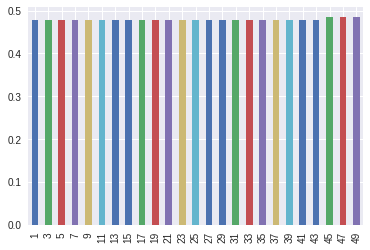

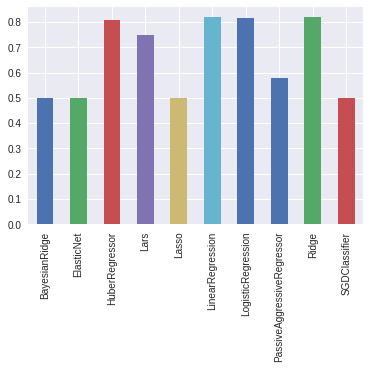

In [19]:
knn_scores = dict()
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10, verbose=5)
    knn_scores[k] = scores.mean()
    
plot_dict(knn_scores)

plots = dict()
for res in result:
    plots[res['name']] = res["best_score"]

plot_dict(plots)


allDone()

In [20]:
allDone()

## XGboost Hyparameters

In [0]:
def select_model(df):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "XGBClassifier",
            "estimator": XGBClassifier(random_state=1),
            "hyperparameters":
                {
                    "learning_rate": [0.2],
                    "min_child_weight" : [2, 4, 6],
                    "n_estimators": [100, 110],
                    'random_seed' : [42]
                }
        }
    ]
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=3,
                            return_train_score='warn', 
                            cv=7)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_test_1000.pkl")
allDone()

XGBClassifier
-------------
Fitting 7 folds for each of 6 candidates, totalling 42 fits
[CV] learning_rate=0.2, min_child_weight=2, n_estimators=100 .........
[CV]  learning_rate=0.2, min_child_weight=2, n_estimators=100, score=0.8217409940518815, total=  45.2s
[CV] learning_rate=0.2, min_child_weight=2, n_estimators=100 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.0s remaining:    0.0s


KeyboardInterrupt: ignored

In [0]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def select_model(df):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,40,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        }, 
# mse better with KNClassifier
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=5,
                            return_train_score='warn', 
                            cv=7)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_gen_test_111.pkl")
allDone()

LogisticRegression
------------------
Fitting 7 folds for each of 3 candidates, totalling 21 fits
[CV] solver=newton-cg ................................................


KeyboardInterrupt: ignored

## SVC classifiers

In [0]:
%%time

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC

# Consider pre-processing your data with StandardScaler or MinMaxScaler.
#   % self.max_iter, ConvergenceWarning)

def select_model(df):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
#         {
#             "name": "LinearSVC",
#             "estimator": LinearSVC(class_weight='balanced'),
#             "hyperparameters":
#                 {
#                     'loss' : ['hinge', 'squared_hinge']
#                 }
#         }
#             ,
#         {
#             "name": "SVC",
#             "estimator": SVC(class_weight='balanced'),
#             "hyperparameters":
#                 {
#                     'kernel' : ['rbf', 'poly', 'sigmoid', 'auto'],
#                     'max_iter' : [1000, 1500]
#                 }
#         },
        {
            "name": "NuSVC",
            "estimator": SVC(class_weight='balanced'),
            "hyperparameters":
                {
#                     'nu' : [0.33, 0.5, 0.66] ,
                    'degree' : [10],
#                     'fit_intercept' : ['True', 'False'],
#                     'probability' : [True, False],
#                     'shrinking' : [True, False],
                    'kernel' : ['rbf', 'poly', 'sigmoid', 'auto']
                }
        }
            ]    
    
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='roc_auc',
                            n_jobs=1,
                            verbose=3,
                            return_train_score='warn', 
                            cv=3)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(all_X)

#pca #acm
# pd.to_pickle("data/model_gen_test_111.pkl")
allDone()

NuSVC
-----
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] degree=10, kernel=rbf ...........................................
[CV] . degree=10, kernel=rbf, score=0.48420669014790785, total=16.9min
[CV] degree=10, kernel=rbf ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 23.9min remaining:    0.0s


[CV] .. degree=10, kernel=rbf, score=0.4762385104055771, total=16.6min
[CV] degree=10, kernel=rbf ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 47.4min remaining:    0.0s


KeyboardInterrupt: ignored

In [0]:


cmb['rgb'] = scale(cmb[msr_col], 1, 0.25)      
cmb['size'] = scale( (cmb[msr_col] * cmb[msr_col]), 100, 1000)
df = pd.concat([cmb.seed, cmb.bk_val_profit_brutto_prc, cmb.bk_val_profit_brutto, cmb.recall_pos_val, cmb.target_col, cmb.return_over, cmb.max_depth_], axis=1)
ms = scatter_matrix(df, alpha=0.50, figsize=figsize_, diagonal='hist', c=cmb['rgb'], s=cmb['size'])

# Next  


* Voting Classifier


1.11.5.3. Using the VotingClassifier with GridSearch
The VotingClassifier can also be used together with GridSearch in order to tune the hyperparameters of the individual estimators:

>>>
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)
1.11.5.3.1. Usage
In order to predict the class labels based on the predicted class-probabilities (scikit-learn estimators in the VotingClassifier must support predict_proba method):

>>>
>>> eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
Optionally, weights can be provided for the individual classifiers:

>>>
>>> eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,5,1])